<a href="https://colab.research.google.com/github/bttrung/secure-private-ai-scholarship/blob/master/3_Training_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [7]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3058, grad_fn=<NllLossBackward>)


In [8]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Define the loss
criterion = nn.NLLLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our log-probabilities
logps = model(images)
# Calculate the loss with the logps and the labels
loss = criterion(logps, labels)

print(loss)

tensor(2.3493, grad_fn=<NllLossBackward>)


In [9]:
x = torch.randn(2,2, requires_grad=True)
print(x)

tensor([[ 0.5499, -1.3530],
        [ 0.7348,  1.3376]], requires_grad=True)


In [10]:
y = x**2
print(y)

tensor([[0.3024, 1.8306],
        [0.5400, 1.7891]], grad_fn=<PowBackward0>)


In [11]:
## grad_fn shows the function that generated this variable
print(y.grad_fn)

In [12]:
z = y.mean()
print(z)

tensor(1.1155, grad_fn=<MeanBackward0>)


In [13]:
print(x.grad)

None


In [14]:
z.backward()
print(x.grad)
print(x/2)

tensor([[ 0.2749, -0.6765],
        [ 0.3674,  0.6688]])
tensor([[ 0.2749, -0.6765],
        [ 0.3674,  0.6688]], grad_fn=<DivBackward0>)


In [0]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [16]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0019, -0.0019, -0.0019,  ..., -0.0019, -0.0019, -0.0019],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        [ 0.0017,  0.0017,  0.0017,  ...,  0.0017,  0.0017,  0.0017],
        ...,
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        [-0.0020, -0.0020, -0.0020,  ..., -0.0020, -0.0020, -0.0020],
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002]])


In [0]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [18]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0240, -0.0326, -0.0271,  ..., -0.0255,  0.0013,  0.0168],
        [-0.0209, -0.0190,  0.0291,  ...,  0.0230, -0.0284,  0.0355],
        [ 0.0290, -0.0160,  0.0302,  ...,  0.0129, -0.0087, -0.0228],
        ...,
        [ 0.0303,  0.0328, -0.0256,  ...,  0.0103, -0.0006,  0.0016],
        [ 0.0204,  0.0219, -0.0220,  ..., -0.0119,  0.0042, -0.0002],
        [-0.0020,  0.0214,  0.0063,  ..., -0.0005,  0.0295, -0.0082]],
       requires_grad=True)
Gradient - tensor([[ 0.0024,  0.0024,  0.0024,  ...,  0.0024,  0.0024,  0.0024],
        [-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006],
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        ...,
        [ 0.0050,  0.0050,  0.0050,  ...,  0.0050,  0.0050,  0.0050],
        [-0.0019, -0.0019, -0.0019,  ..., -0.0019, -0.0019, -0.0019],
        [ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007]])


In [19]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0240, -0.0326, -0.0271,  ..., -0.0255,  0.0012,  0.0168],
        [-0.0208, -0.0190,  0.0291,  ...,  0.0230, -0.0284,  0.0355],
        [ 0.0290, -0.0160,  0.0302,  ...,  0.0129, -0.0088, -0.0229],
        ...,
        [ 0.0303,  0.0327, -0.0257,  ...,  0.0102, -0.0007,  0.0015],
        [ 0.0204,  0.0219, -0.0220,  ..., -0.0119,  0.0042, -0.0001],
        [-0.0020,  0.0214,  0.0063,  ..., -0.0006,  0.0295, -0.0082]],
       requires_grad=True)


In [20]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.8835779194638673
Training loss: 0.8339055864605059
Training loss: 0.5128205874835504
Training loss: 0.4209383172966016
Training loss: 0.3779910124504744


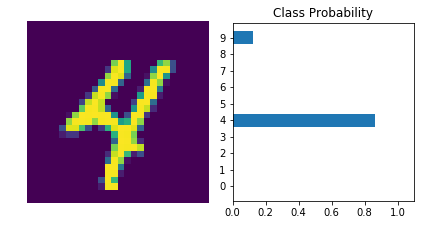

In [21]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)